# Unicorn Companies
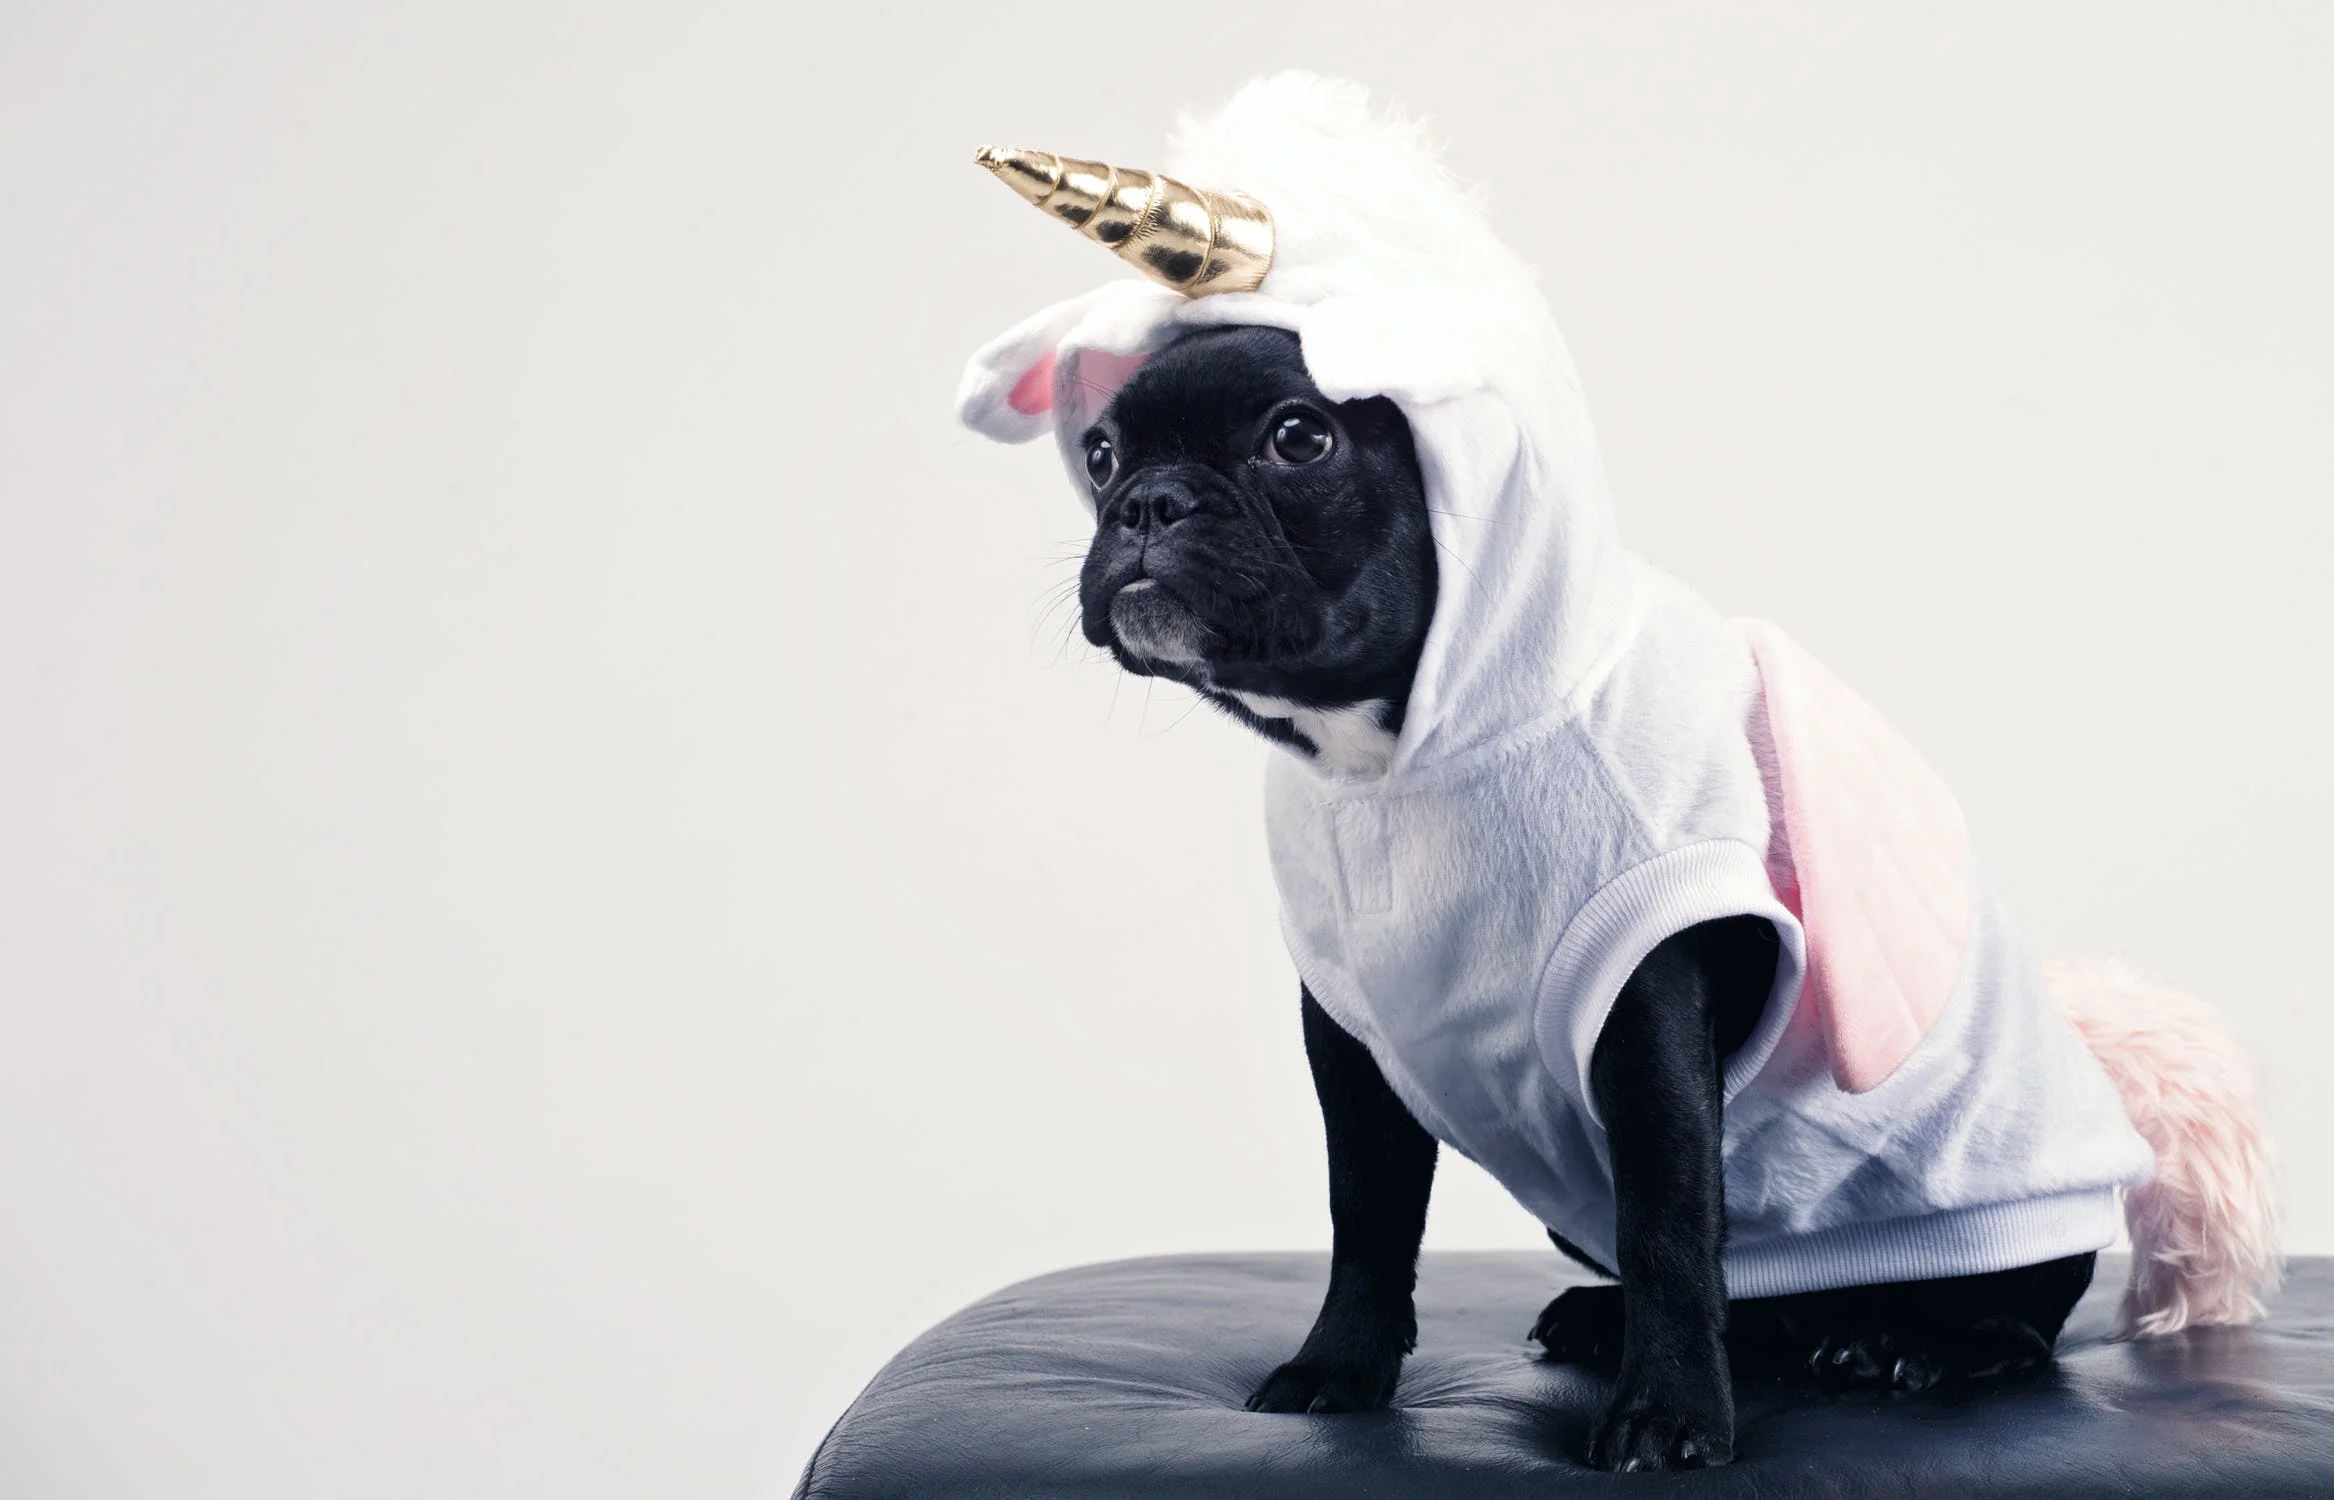

Private companies with a valuation over $1 billion as of March 2022, including each company's current valuation, funding, country of origin, industry, select investors, and the years they were founded and became unicorns. 
>Data acquired from [Maven Analytics](https://www.mavenanalytics.io/data-playground?tags=57i7XlW6LkVTbF7n5UYhhS)

## Importing the data

In [1]:
# bringing in libraries
import pandas as pd
import numpy as np

In [2]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('unicorn_data/unicorn_data.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## First Look

In [4]:
df.head(1)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."


### Data Dictionary
Field | Description | Notes
:-- | :-- | :--
Company | Company name
Valuation | Company valuation in billions (B) of dollars | remove `$` and `B`
Date Joined | The date in which the company reached $1 billion in valuation
Industry | Company industry
City | City the company was founded in
Country | Country the company was founded in
Continent | Continent the company was founded in
Year Founded | Year the company was founded
Funding | Total amount raised across all funding rounds in billions (B) or millions (M) of dollars | remove `$` and `B`
Select Investors | Top 4 investing firms or individual investors (some have less than 4)

### Other notes...
- Column names need to be lowercased, and spaces in between words need to be changed to `_`
- `Select Investors` column probably has multiple values..

In [5]:
# looking at Select Investors columns for first entry
print((df['Select Investors'][0]))
print(type(df['Select Investors'][0]))

Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group
<class 'str'>


...`Select Investors` column does have multiple values and is currently a string. Should make this column a list for accessing for additional info later
- Also want to look at dtypes

In [6]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

## Data cleaning
1. lowercase and remove inner spacing from column names
2. `valuation` and `funding` 
    - remove `$` and `B`
    - change to float dtype
 
3. `date_joined` should be date dtype
4. (maybe later) change `select_investors` from string to list of strings

In [7]:
# 1a. lowercaseing column names
df.columns = df.columns.str.lower()

df.head(2)

,company,valuation,date joined,industry,city,country,continent,year founded,funding,select investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."


In [8]:
# 1b. replacing inner column spacing with _
df.rename(columns = {'date joined':'date_joined', 
                     'year founded':'year_founded',
                     'select investors':'select_investors'}, inplace = True)

df.head()

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [9]:
# 2. removing $ and B from valuation and funding and changing dtype to float

# initalizing list
new_valuation = []

# for loop to populate list
for value in df.valuation:
    new_valuation.append(float(value.replace('$', '').replace('B', '')))

# replacing current series with new series of float numbers
df.valuation = new_valuation


In [10]:
df.funding

0         $8B
1         $7B
2         $2B
3         $2B
4         $4B
        ...  
1069    $379M
1070    $990M
1071     $80M
1072    $792M
1073    $620M
Name: funding, Length: 1074, dtype: object

In [11]:
# initalizing list
new_funding = []

# for loop to populate list
for funding in df.funding:
    new_funding.append((funding.replace('$', '').replace('B', '').replace('M', '')))
                       
new_funding

['8',
 '7',
 '2',
 '2',
 '4',
 '572',
 '2',
 '3',
 '14',
 '3',
 '2',
 '7',
 '2',
 '4',
 '2',
 '4',
 '5',
 '918',
 '476',
 '4',
 '770',
 '979',
 '721',
 '3',
 '490',
 '734',
 '2',
 '427',
 '400',
 '4',
 '4',
 '1',
 '1',
 '1',
 '2',
 '799',
 '765',
 '800',
 '5',
 '376',
 '1',
 '5',
 '558',
 '5',
 '1',
 '1',
 '3',
 '294',
 '3',
 '572',
 '1',
 '564',
 '4',
 '1',
 '333',
 '691',
 '2',
 '343',
 '1',
 '497',
 '2',
 '71',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '679',
 '770',
 '775',
 '2',
 '105',
 '1',
 '742',
 '607',
 '2',
 '549',
 '1',
 '1',
 '660',
 '820',
 '1',
 '2',
 '297',
 '1',
 '2',
 '922',
 '863',
 '4',
 '447',
 '1',
 '844',
 '2',
 '603',
 '583',
 '912',
 '920',
 '849',
 '424',
 '660',
 '1',
 '645',
 '2',
 '1',
 '3',
 '802',
 '629',
 '448',
 '928',
 '815',
 '728',
 '433',
 '1',
 '891',
 '1',
 '524',
 '803',
 '1',
 '415',
 '587',
 '1',
 '826',
 '910',
 '412',
 '405',
 '729',
 '600',
 '869',
 '187',
 '1',
 '943',
 '514',
 '492',
 '1',
 '644',
 '1',
 '562',
 '286',
 '943',
 '691',
 '559',


### Some of the rows have `Unknown` for funding

In [12]:
# looking at rows with unknown funding
df[df.funding == 'Unknown']

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
215,SSENSE,4.0,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,Unknown,Sequoia Capital
424,Uplight,2.0,2021-03-03,Other,Boulder,United States,North America,2019,Unknown,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,2.0,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,Unknown,Blackstone
639,SITECH DEV,1.0,2019-05-16,Other,Guiyang,China,Asia,2017,Unknown,China Prosperity Capital
651,Xiaobing,1.0,2021-07-12,Fintech,Beijing,China,Asia,2020,Unknown,"NetEase Capital, Northern Light Venture Capita..."
717,Veepee,1.0,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,Unknown,"Summit Partners, Qatar Holding"
733,DistroKid,1.0,2021-08-16,Internet software & services,New York,United States,North America,2013,Unknown,"Insight Partners, Silversmith Capital Partners..."
866,Assembly,1.0,2021-09-21,Internet software & services,Culver City,United States,North America,2019,Unknown,"Advent International, PSG, Providence Equity P..."
890,Carson Group,1.0,2021-07-14,Fintech,Lincoln,United States,North America,2012,Unknown,Bain Capital
945,Iodine Software,1.0,2021-12-01,Data management & analytics,Austin,United States,North America,2010,Unknown,"Advent International, Bain Capital Ventures, S..."


...for now will drop these so I can rerun for loop and convert values to float

In [13]:
# dropping unknowns for funding
df = df[df.funding != 'Unknown']

# verifying dropped from df
df[df.funding == 'Unknown']

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors


In [14]:
# rerunning for loop...

# initalizing list
new_funding = []

# for loop to populate list
for funding in df.funding:
    new_funding.append(float(funding.replace('$', '').replace('B', '').replace('M', '')))
   
# replacing object series with list of floats
df.funding = new_funding

df.funding

0         8.0
1         7.0
2         2.0
3         2.0
4         4.0
        ...  
1069    379.0
1070    990.0
1071     80.0
1072    792.0
1073    620.0
Name: funding, Length: 1062, dtype: float64

In [15]:
# verifying update
df.valuation.dtype

dtype('float64')

In [16]:
df.funding.dtype

dtype('float64')

In [17]:
# 3. changing date joined to date dtype
df.date_joined = pd.to_datetime(df.date_joined)

In [18]:
# verifying update
df.date_joined.dtype

dtype('<M8[ns]')

In [19]:
# last check of columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   company           1062 non-null   object        
 1   valuation         1062 non-null   float64       
 2   date_joined       1062 non-null   datetime64[ns]
 3   industry          1062 non-null   object        
 4   city              1046 non-null   object        
 5   country           1062 non-null   object        
 6   continent         1062 non-null   object        
 7   year_founded      1062 non-null   int64         
 8   funding           1062 non-null   float64       
 9   select_investors  1061 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 91.3+ KB


Data looks good, but need to look into nulls..

In [20]:
# df.isna().sum() 
df.isna().sum()/df.shape[0]

company             0.000000
valuation           0.000000
date_joined         0.000000
industry            0.000000
city                0.015066
country             0.000000
continent           0.000000
year_founded        0.000000
funding             0.000000
select_investors    0.000942
dtype: float64

Null values are < 1% of the data... want to look at rows with null values

In [21]:
# looking at rows where city is null
df[df.city.isna() == True]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
12,FTX,32.0,2021-07-20,Fintech,NaN,Bahamas,North America,2018,2.0,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,4.0,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,263.0,Kuang-Chi
242,Moglix,3.0,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,471.0,"Jungle Ventures, Accel, Venture Highway"
251,Trax,3.0,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,1.0,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,3.0,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,328.0,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,2.0,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,975.0,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,2.0,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,536.0,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,1.0,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,288.0,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,1.0,2021-06-01,Fintech,NaN,Singapore,Asia,2019,100.0,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,1.0,2021-07-01,Fintech,NaN,Singapore,Asia,2018,210.0,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [22]:
# looking at select contry --> Hong Kong that had some null cities
df[(df.country == 'Hong Kong')]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
56,Lalamove,10.0,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,2.0,"MindWorks Ventures, Shunwei Capital Partners, ..."
325,Amber Group,3.0,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,328.0,"Tiger Global Management, Tiger Brokers, DCM Ve..."
595,Trendy Group International,2.0,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,200.0,L Capital Partners
720,Klook,1.0,2018-08-07,Travel,Central,Hong Kong,Asia,2014,722.0,"Sequoia Capital China, Goldman Sachs, Matrix P..."
893,Cider,1.0,2021-09-02,E-commerce & direct-to-consumer,NaN,Hong Kong,Asia,2020,140.0,"Andreessen Horowitz, DST Global, IDG Capital"
1061,WeLab,1.0,2017-11-08,Fintech,NaN,Hong Kong,Asia,2013,871.0,"Sequoia Capital China, ING, Alibaba Entreprene..."


This is not dependent on country *Hong Kong has some cities with values and some without* even though this is a small percentage of total data, it is enough of the subset where I do not want to drop them. For now I will just change the null values to say no_city

In [23]:
# replacing Nulls with no_city
df.city.fillna('no_city', inplace = True)

In [24]:
# verifying nulls removed from col
df.city.isna().sum()

0

In [25]:
# looking at select investor nulls
df[df.select_investors.isna() == True]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
629,LinkSure Network,1.0,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,52.0,NaN


### After doing some [research](https://www.cbinsights.com/company/linksure-network/financials)...
'LinkSure Network' investors:
- Haitong Kaiyuan Investment, 
- Northern Light Venture Capital, 
- and Undisclosed Investors

In [26]:
# changing value
df.select_investors[629] = 'Haitong Kaiyuan Investment, Northern Light Venture Capital, and Undisclosed Investors'

<ipython-input-26-29abb2287547>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.select_investors[629] = 'Haitong Kaiyuan Investment, Northern Light Venture Capital, and Undisclosed Investors'


In [27]:
# verifying
df.select_investors[629]

'Haitong Kaiyuan Investment, Northern Light Venture Capital, and Undisclosed Investors'

In [28]:
# verifying all nulls taken care of ...
df.isna().sum().sum()

0

In [29]:
df.head()

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


### Initial Questions
1. What are the distributions of:
    - Valuations
    - Dates joined
    - Years founded
    - Funding

2. What _________ are most and least represented?
    - industries
    - continents
    - countries
    - cities
    
3. What (a)comapnies/(b)years/(c)industries/(d)months had the (i)highest and (ii)lowest total funding
4. What (a)comapnies/(b)years/(c)industries/(d)months had the (i)highest and (ii)lowest average funding
5. What (a)comapnies/(b)years/(c)industries/(d)months had the (i)highest and (ii)lowest total valuation
6. What (a)comapnies/(b)years/(c)industries/(d)months had the (i)highest and (ii)lowest average valuation

array([[<AxesSubplot:title={'center':'valuation'}>,
        <AxesSubplot:title={'center':'date_joined'}>],
       [<AxesSubplot:title={'center':'year_founded'}>,
        <AxesSubplot:title={'center':'funding'}>]], dtype=object)

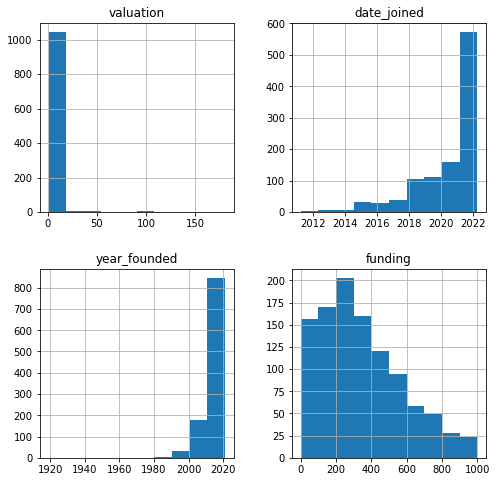

In [30]:
# 1. distrubtions of numeric variables
df.hist(figsize = (8, 8))

### Takeaways
a. `date_joined` and `year_founded` are both right skewed, I wonder how they correlate/what their correlation looks like?<br>
b `valuation` and `funding` are both left skewed and I am also curious about how they correlate.<br>
c `valuation` looks to have a lot of outliers, I would like to dive deeper with smaller distribution buckets.<br>
d. looks like the `year_founded` goes back to 1920, really curious to see info about some of the older companies
    - could create groupings based on quartiles and do additional EDA based on year founded

In [31]:
# a. looking at correlation between date_joined and year_founded

from scipy import stats

def var_correlation(df, x_var, y_var):
    '''
    
    '''
    #plot scatterplot
    sns.regplot(data = df, x = x_var, y = y_var, line_kws = {'color': 'red'})
    plt.title(f'{x_var.upper()} and {y_var.upper()} Correlation')
    plt.show()
    
    #spearman's test
    r, p = stats.spearmanr(df[x_var], df[y_var])
    print(f'Correlation: {r}\nThere is a {round(p, 4)}% chance that we see these results by chance')
    

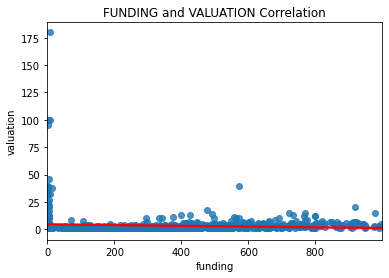

Correlation: 0.14225833181800604
There is a 0.0% chance that we see these results by chance


In [32]:
var_correlation(df, 'funding', 'valuation')

#### Thse would need to be scaled to get an accurate picture of their true correlation
Let's look at date variables....

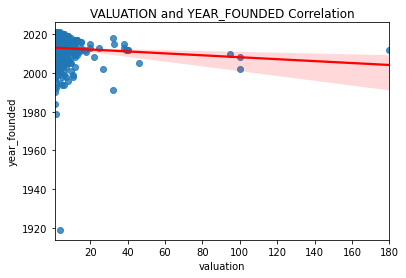

Correlation: -0.06993601581556064
There is a 0.0227% chance that we see these results by chance


In [33]:
var_correlation(df, 'valuation', 'year_founded')

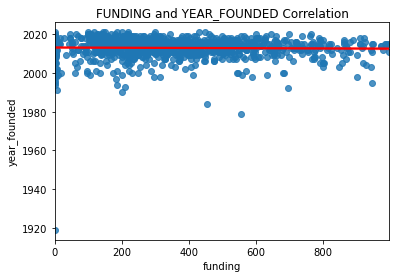

Correlation: -0.08219258660744504
There is a 0.0074% chance that we see these results by chance


In [34]:
var_correlation(df, 'funding', 'year_founded')

## This is really comparing apples to oranges...
There are also lots of outliers. Going to look at a few other ways of visualizing the data and explore some options for more accurate comparisons.

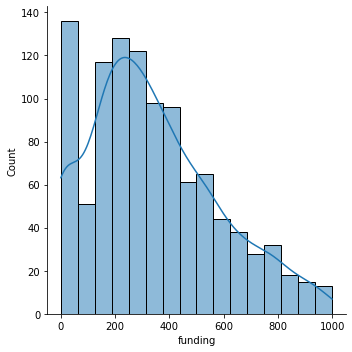

In [68]:
# looking more closely at the distribution for funding
sns.displot(data = df, x = 'funding', kde = True)

In [40]:
# looking at the dtypes to try and plot using a for loop
df.dtypes

company                     object
valuation                  float64
date_joined         datetime64[ns]
industry                    object
city                        object
country                     object
continent                   object
year_founded                 int64
funding                    float64
select_investors            object
dtype: object

In [41]:
# wantg to exclude non-numeric and date dtypes
df.company.dtype

dtype('O')

In [69]:
df.date_joined.dtype

dtype('<M8[ns]')

In [84]:
# looking at numeric (and date) values
for col in df.columns:
    if df[col].dtype != 'O':
        print(col)

valuation
date_joined
year_founded
funding


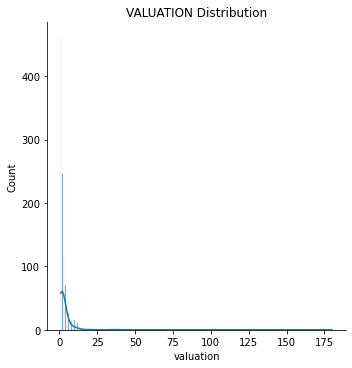

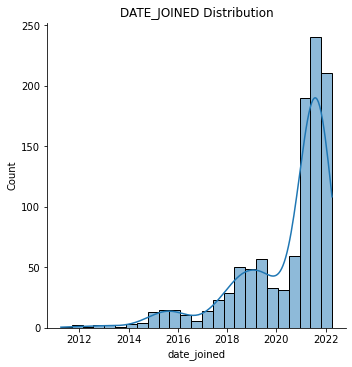

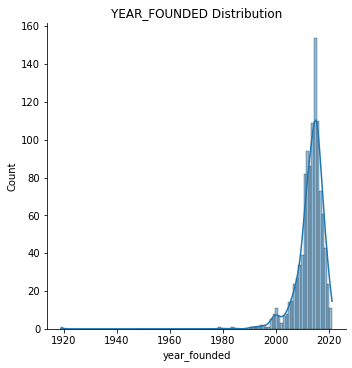

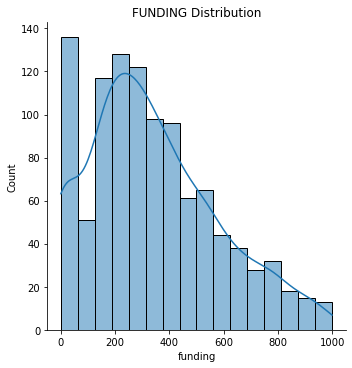

In [89]:
# looking at the distributions
for col in df.columns:
    if df[col].dtype != 'O':
        sns.displot(data = df, x = col, kde = True)
        plt.title(f'{col.upper()} Distribution')
        plt.show()

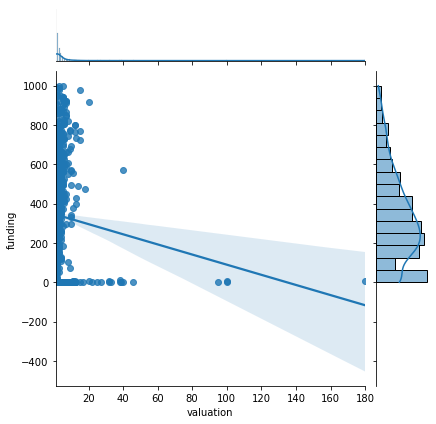

In [66]:
sns.jointplot(data=df, x="valuation", y="funding", kind="reg")

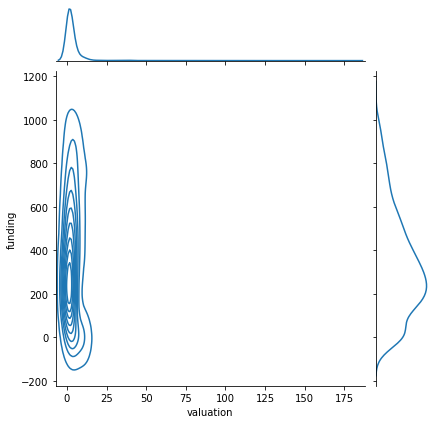

In [90]:
sns.jointplot(data=df, x="valuation", y="funding", kind="kde")

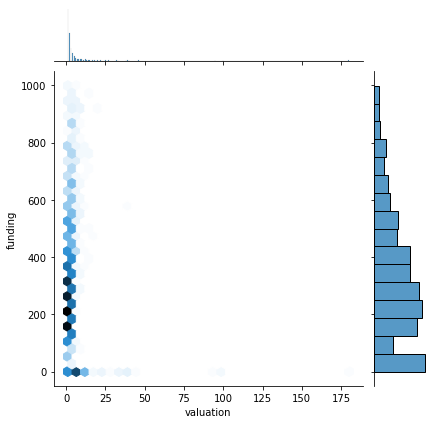

In [95]:
sns.jointplot(data=df, x="valuation", y="funding", kind="hex")

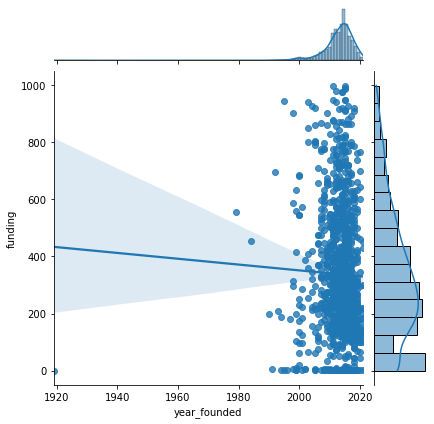

In [91]:
sns.jointplot(data=df, x="year_founded", y="funding", kind="reg")

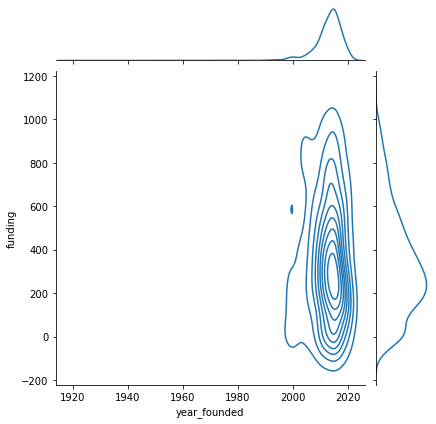

In [92]:
sns.jointplot(data=df, x="year_founded", y="funding", kind="kde")

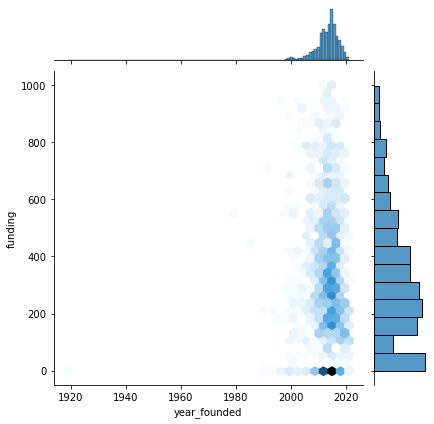

In [93]:
sns.jointplot(data=df, x="year_founded", y="funding", kind="hex")

## Outliers and unscaled numbers are making it hard to compare values and see correlations and insights. 
Going to look at IQR for the numeric variables using boxplots

In [60]:
# checking to see how can remove value from series turned into list
df.columns.to_list().remove('date_joined')

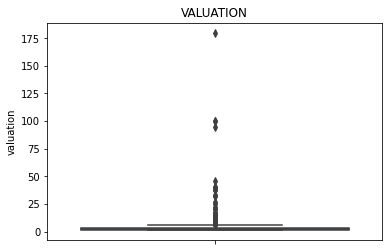

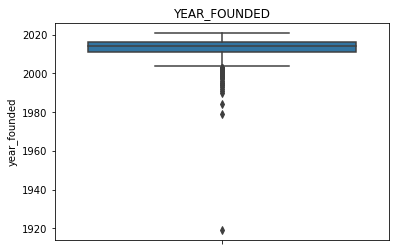

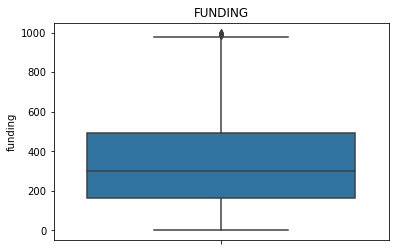

In [64]:
# for loop to get boxplots for numeric variables --> looking at IQR
nums =  df.columns.to_list()
nums.remove('date_joined')

for col in nums:
    
    if (df[col].dtype != 'O'):
        sns.boxplot(data = df, y = col)
        plt.title(f'{col.upper()}')
        plt.show()

## Valuation and Year Founded have a lot of outliers. 
Two cleanup items that could help...
- Exploring outliers (possibly removing)
- Scaling variables

## Looking at outliers ...

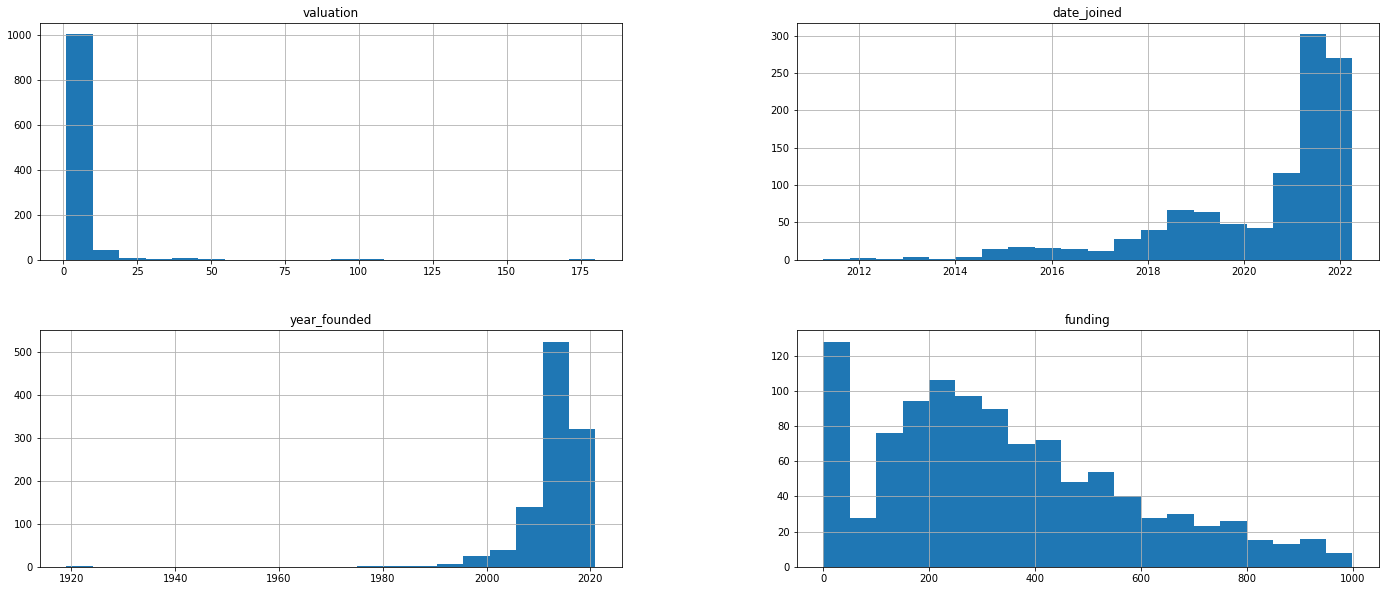

In [171]:
df.hist(figsize=(24, 10), bins=20)
plt.show()

(1.0, 3.0)

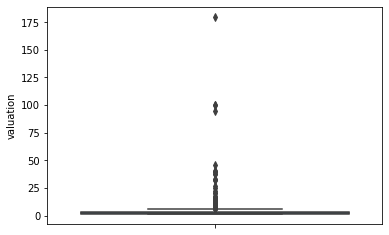

In [112]:
# looking at the 1st and 3rd percentiles (what the outlier function should visualize and print)
sns.boxplot(y = df.valuation)

np.percentile(df.valuation, 25), np.percentile(df.valuation, 75)

In [109]:
# df of values outside of IQR (what the outliers function can return)
df[(df.valuation < np.percentile(df.valuation, 25)) | (df.valuation > np.percentile(df.valuation, 75))]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
235,Rubrik,4.0,2017-04-28,Data management & analytics,Palo Alto,United States,North America,2014,553.0,"Greylock Partners, Lightspeed Venture Partners..."
236,Vuori,4.0,2021-10-13,E-commerce & direct-to-consumer,Carlsbad,United States,North America,2015,445.0,"SoftBank Group, Norwest Venture Partners"
237,Webflow,4.0,2021-01-13,Internet software & services,San Francisco,United States,North America,2012,335.0,"Accel, Silversmith Capital Partners, capitalG"
238,Yuga Labs,4.0,2022-03-22,Fintech,Miami,United States,North America,2021,450.0,"Andreessen Horowitz, Thrive Capital, Sound Ven..."


In [117]:
# percentage of values below and above IQR (also printout for function)
df[df.valuation < np.percentile(df.valuation, 25)]

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors


In [123]:
df[df.valuation > np.percentile(df.valuation, 75)].shape[0] / df.shape[0]

0.22504708097928436

In [187]:
def explore_outliers(df, var):
    '''
    Args:
    - df
    - var: str
    Returns:
    - lower_IQR df
    - upper IQR df
    
    This function takes in a df and column and prints lower and upper IQR, min, and max values for
    that column. It returns two subsets of the original df, one with lower IQR values and the other
    with the upper values. It also plots the data with and without outliers.
    '''
    #get quartile ranges
    lower_range = np.percentile(df[var], 25)
    upper_range = np.percentile(df[var], 75)
    print(f'Lower {var.upper()} IQR: {lower_range} | Min: {df[var].min()}')
    print(f'Upper {var.upper()} IQR: {upper_range} | Max: {df[var].max()}')
    print()
    
    #dfs
    df_below_lower = df[df[var] < lower_range]
    df_above_upper = df[df[var] > upper_range]
    print(f'{round(df_below_lower.shape[0] / df.shape[0], 2)}% below IQR')
    print(f'{round(df_above_upper.shape[0] / df.shape[0], 2)}% above IQR')
    
    #visualizing data with and without outliers
    sns.boxenplot(data = df, y = var)
    plt.title(f'{var.upper()} with outliers')
    plt.show()
    sns.boxenplot(data = df[(df[var] > lower_range) & (df[var] < upper_range)], y = var)
    plt.title(f'{var.upper()} without outliers')
    plt.show()
    
    return df_below_lower, df_above_upper

Lower VALUATION IQR: 1.0 | Min: 1.0
Upper VALUATION IQR: 3.0 | Max: 180.0

0.0% below IQR
0.23% above IQR


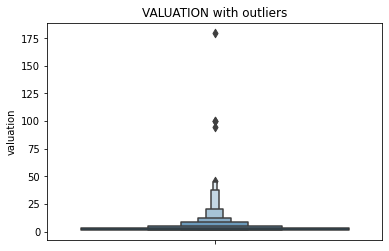

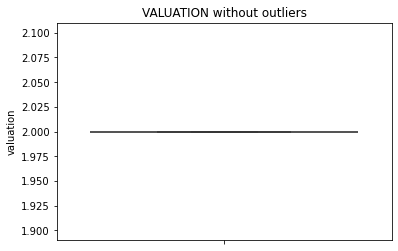

In [181]:
val_lower, val_upper = explore_outliers(df, 'valuation')

### Removing the outliers from `valuation` leaves us with only one value. 
This figure is rounded (in Billions) so I will leave the outliers in since there can be so much variation in one value (1.1B vs 1.9B)

Lower FUNDING IQR: 166.0 | Min: 0.0
Upper FUNDING IQR: 491.5 | Max: 999.0

0.25% below IQR
0.25% above IQR


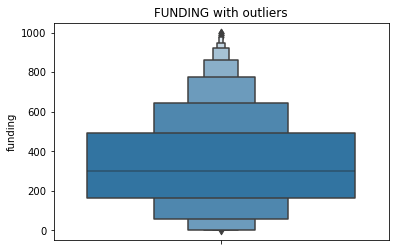

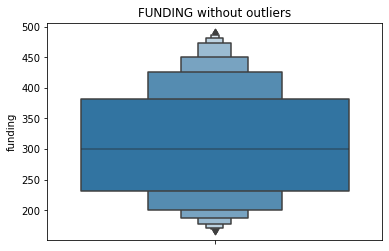

In [183]:
fund_lower, fund_upper = explore_outliers(df, 'funding')

Lower YEAR_FOUNDED IQR: 2011.0 | Min: 1919
Upper YEAR_FOUNDED IQR: 2016.0 | Max: 2021

0.2% below IQR
0.2% above IQR


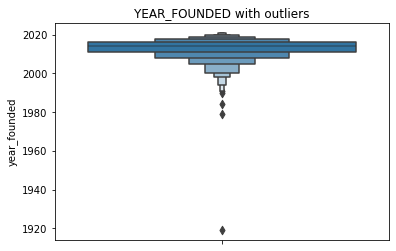

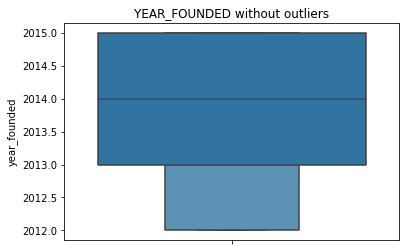

In [184]:
year_lower, year_upper = explore_outliers(df, 'year_founded')

In [185]:
date_lower, date_upper = explore_outliers(df, 'date_joined')

Lower DATE_JOINED IQR: 2019-05-21T12:00:00.000000000 | Min: 2011-04-02 00:00:00
Upper DATE_JOINED IQR: 2021-09-21T00:00:00.000000000 | Max: 2022-04-05 00:00:00

0.25% below IQR
0.25% above IQR


TypeError: Vertical orientation requires numeric `y` variable.

## In order to look at `date_joined` outliers, need a `year_joined` column

In [ ]:
# creating year_joined column from date_joined

## Looking at categorical variable distributions 
Upper and lower values...

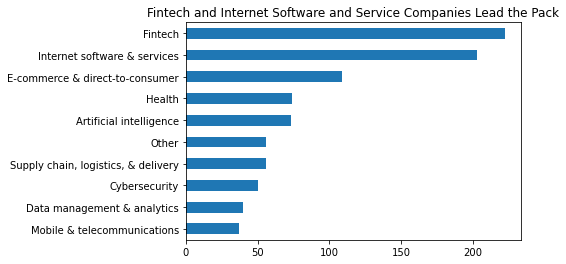

In [97]:
df.industry.value_counts()[:10].sort_values().plot.barh()
plt.title('Fintech and Internet Software and Service Companies Lead the Pack')
plt.show()

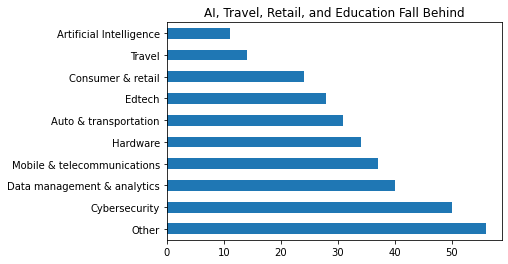

In [98]:
df.industry.value_counts()[-10:].plot.barh()
plt.title('AI, Travel, Retail, and Education Fall Behind')
plt.show()

## I am curious to look specifically at edTech for the dates...
I would guess that COVID has seen an explosion of edTech startups. It may be too early to draw any conclusions but I would like to look at a more recent subset of the Edtech companies for further exploration and comparison to Unicorn population, as well as other industry subgroups and/or edTech timeframes.

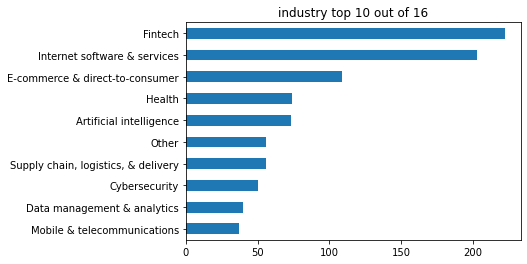

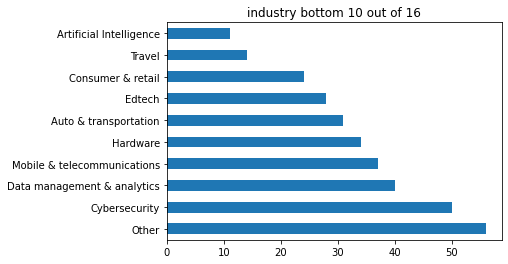

------------------------------


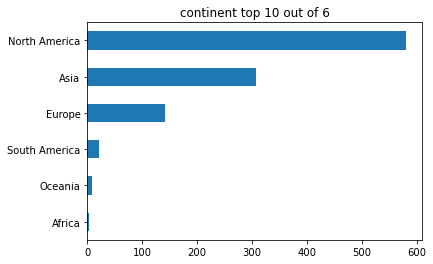

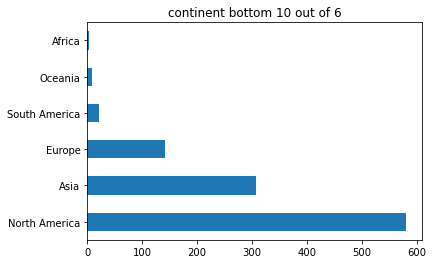

------------------------------


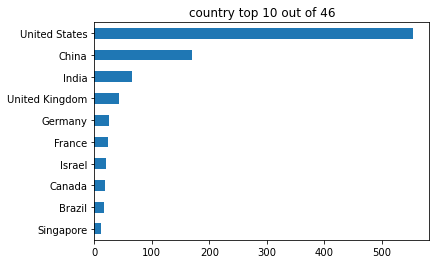

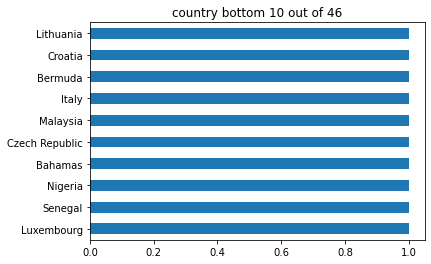

------------------------------


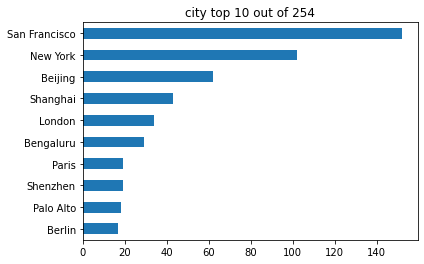

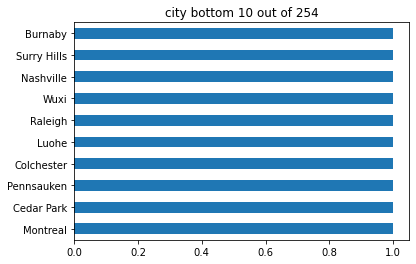

------------------------------


In [37]:
# savings categorical variables
cat_vars = ['industry', 'continent', 'country', 'city']

# plotting counts of categorical variables (only top and bottom 10 for unique values > 10)
for var in cat_vars:
    df[var].value_counts()[:10].sort_values().plot.barh()
    plt.title(f'{var} top 10 out of {df[var].nunique()}')
    plt.show()
    df[var].value_counts()[-10:].plot.barh()
    plt.title(f'{var} bottom 10 out of {df[var].nunique()}')
    plt.show()
    print('------------------------------')
    

## Africa barely representing in unicorns...
Curious to see what industries are the most prominent among that subset...

In [99]:
df[df.continent == 'Africa']

,company,valuation,date_joined,industry,city,country,continent,year_founded,funding,select_investors
484,Wave,2.0,2021-09-07,Fintech,Dakar,Senegal,Africa,2018,200.0,"Stripe, Founders Fund, Partech Partners"
585,Opay,2.0,2021-08-23,Fintech,Lagos,Nigeria,Africa,2018,570.0,"Sequoia Capital China, Source Code Capital, Re..."
607,Cell C,1.0,2017-08-07,Mobile & telecommunications,Midrand,South Africa,Africa,2000,547.0,"Blue Label Telecoms, Net1 UEPS Technologies"


<AxesSubplot:>

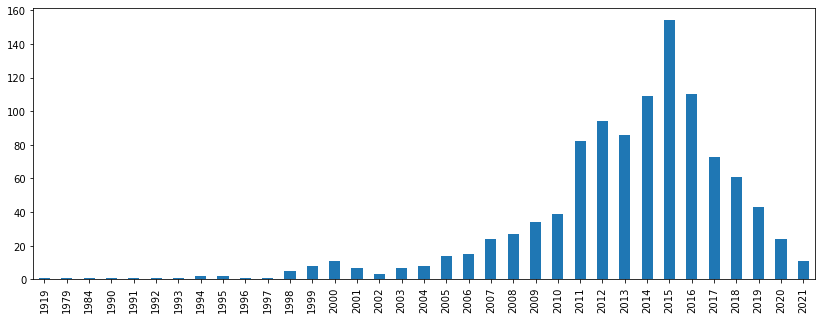

In [38]:
df.year_founded.value_counts().sort_index().plot.bar(figsize = (14, 5))